# Genetic Algotithm

##1.1 Meintenance Scheduling

In [ ]:
import random
import matplotlib.pyplot as plt

In [ ]:
def init_chromosome_first(meintenance, gene_size = 4):
  """
  Argument:
    meintenance -- Number of intervals required for unit maintenance during one year
    gene_size -- each gene consistes of number of binary bits i.e. length of each gene
    
  Returns:
    chromosome -- a chromosome
  """
  chromosome = []
  for i in range(len(meintenance)):
    gene = [0]*gene_size
    positions = random.sample(range(0, gene_size), meintenance[i])
    for pos in positions:
      gene[pos] = 1
    chromosome.append(gene)
  
  return chromosome

In [ ]:
# check for above method
unit_capacity = [20, 15, 35, 40, 15, 15, 10]
unit_meintenance = [2, 2, 1, 1, 1, 1, 1]
init_chromosome_first(unit_meintenance, 4)

[[0, 0, 1, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [1, 0, 0, 0],
 [0, 0, 1, 0]]

In [ ]:
def calc_fitness_first(chromosome, capacity, max_load, gene_size = 4):
  """
  Argument:
    chromosome -- a list of length equal to number of queens
    capacity -- Unit capacity, (in MW)
    max_load -- maximum load 
    gene_size -- each gene consistes of number of binary bits i.e. length of each gene
  Returns:
    fitness -- score for given chromosome
  """
  fitness_interval = [0]*gene_size
  for i in range(len(chromosome)):
    for j in range(len(chromosome[i])):
      fitness_interval[j] += chromosome[i][j] * capacity[i]

  # print(fitness_interval)

  total_capacity = sum(capacity)
  fitness_interval = [total_capacity - fit for fit in fitness_interval]
  # print(fitness_interval)

  for i in range(len(fitness_interval)):
    fitness_interval[i] -= max_load[i]
  # print(fitness_interval)

  fitness = min(fitness_interval)
  if fitness < 0:
    fitness = 0
  return fitness

In [ ]:
# check for above method
x = init_chromosome_first(unit_meintenance, 4)
print(x)
max_load = [80, 90, 65, 70]
calc_fitness_first(x, unit_capacity, max_load, 4)

[[0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]


15

In [ ]:
def selection_first(population, probabilities): # select two chromosomes from population for hybridization
  """
  Argument:
    population -- consists of all chromosomes
    probabilities -- corresponding probability of each chromosome
    
  Returns:
     -- selected chromosome
  """
  map = zip(population, probabilities)
  thresold = random.uniform(0, 1)
  upto = 0

  for k, v in map:
    if upto + v >= thresold:
      return k
    upto += v

  return population[0]

In [ ]:
def crossover_first(chromosome1, chromosome2): # crossover of two randomly selected chromosomes
  """
  Argument:
    chromosome1 -- CHROMOSOME 1
    chromosome2 -- CHROMOSOME 2
    
  Returns:
     -- return crossed two chromosome
  """
  n = len(chromosome1)
  c = random.randint(0, n - 1)
  chr1 = chromosome1[0:c] + chromosome2[c:n]
  chr2 = chromosome2[0:c] + chromosome1[c:n]

  return chr1, chr2

In [ ]:
# check for above method
chr1 = init_chromosome_first(unit_meintenance, 4)
chr2 = init_chromosome_first(unit_meintenance, 4)
print(chr1)
print(chr2)
crossover_first(chr1, chr2)

[[0, 0, 1, 1], [0, 1, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 1, 0]]
[[1, 0, 0, 1], [1, 0, 1, 0], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0]]


([[0, 0, 1, 1],
  [0, 1, 0, 1],
  [0, 0, 1, 0],
  [0, 0, 0, 1],
  [1, 0, 0, 0],
  [0, 1, 0, 0],
  [0, 0, 1, 0]],
 [[1, 0, 0, 1],
  [1, 0, 1, 0],
  [0, 0, 1, 0],
  [0, 1, 0, 0],
  [1, 0, 0, 0],
  [0, 0, 1, 0],
  [0, 0, 1, 0]])

In [ ]:
def mutate_first(chromosome, gene_size = 4): # mutation of a chromosome at a gene
  """
  Argument:
    chromosome -- CHROMOSOME 
    
  Returns:
     -- return mutate chromosome
  """
  n = len(chromosome)
  c = random.randint(0, n - 1)

  x = chromosome[c]
  s = sum(x)
  gene = [0]*gene_size
  positions = random.sample(range(0, gene_size), s)
  for pos in positions:
      gene[pos] = 1
  chromosome[c] = gene

  return chromosome

In [ ]:
# check for above method
print(x)
x = mutate_first(x)
print(x)

[[0, 0, 1, 1], [0, 1, 1, 0], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]
[[0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 1, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]]


In [ ]:
def hybrid_first(population, capacity, maintenance, max_load, gene_size, probability_mutation = 0.01): # hybridization of chromosomes
  """
  Argument:
    population           -- collection of chromosomes
    capacity             -- Unit capacity, (in MW)
    meintenance          -- Number of intervals required for unit maintenance during one year
    max_load             -- maximum load 
    gene_size            -- each gene consistes of number of binary bits i.e. length of each gene
    probability_mutation -- mutation probability
    
  Returns:
    new_population       -- return new population after successful hybridization
  """
  new_population = []

  total_fitness = sum([calc_fitness_first(chromosome, capacity, max_load, gene_size) for chromosome in population])
  probabilities = [calc_fitness_first(chromosome, capacity, max_load, gene_size)/total_fitness for chromosome in population]
  
  for i in range(len(population)//2):
    chrom1 = selection_first(population, probabilities)
    chrom2 = selection_first(population, probabilities)

    c1, c2 = crossover_first(chrom1, chrom2)

    if random.random() < probability_mutation:
      c1 = mutate_first(c1, gene_size)
    if random.random() < probability_mutation:
      c2 = mutate_first(c2, gene_size)
    
    new_population.append(c1)
    new_population.append(c2)
    
  return new_population

In [ ]:
# Initialization
unit_capacity = [20, 15, 35, 40, 15, 15, 10]
unit_meintenance = [2, 2, 1, 1, 1, 1, 1]
max_load = [80, 90, 65, 70]

gene_size = 4

In [ ]:
number_populations = 20
init_population = [init_chromosome_first(unit_meintenance, gene_size) for i in range(number_populations)]
# print(init_population)

###1.1.1 With 100 generations and Mutation probability of 0.01

In [ ]:
# Main Method
generations = 0
net_res_arr = []
generations_arr = []
probability_mutation = 0.01

fitness_arr = []
population = init_population
for i in range(len(population)):
  fitness_arr.append(calc_fitness_first(population[i], unit_capacity, max_load, gene_size))
generations_arr.append(generations)
net_res_arr.append(min(fitness_arr))
# print(generations_arr)
# print(net_res_arr)


while generations < 100:
  population = hybrid_first(population, unit_capacity, unit_meintenance, max_load, gene_size, probability_mutation)
  fitness_arr = []
  for i in range(len(population)):
    fitness_arr.append(calc_fitness_first(population[i], unit_capacity, max_load, gene_size))
  generations_arr.append(generations)
  net_res_arr.append(min(fitness_arr))
  generations += 1

# print(generations_arr)
# print(net_res_arr)

Text(0.5, 1.0, 'N = 100 and probability of mutation = 0.01')

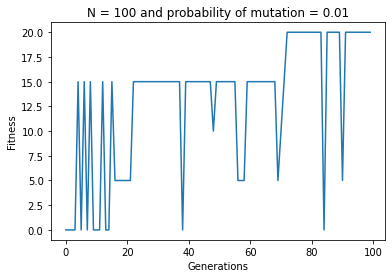

In [ ]:
plt.plot(generations_arr, net_res_arr)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title("N = 100 and probability of mutation = 0.01")

###1.1.2 With 100 generations and Mutation probability of 0.001

In [ ]:
# Main Method
generations = 0
net_res_arr = []
generations_arr = []
probability_mutation = 0.001

fitness_arr = []
population = init_population
for i in range(len(population)):
  fitness_arr.append(calc_fitness_first(population[i], unit_capacity, max_load, gene_size))
generations_arr.append(generations)
net_res_arr.append(min(fitness_arr))
# print(generations_arr)
# print(net_res_arr)


while generations < 100:
  population = hybrid_first(population, unit_capacity, unit_meintenance, max_load, gene_size, probability_mutation)
  fitness_arr = []
  for i in range(len(population)):
    fitness_arr.append(calc_fitness_first(population[i], unit_capacity, max_load, gene_size))
  generations_arr.append(generations)
  net_res_arr.append(min(fitness_arr))
  generations += 1

# print(generations_arr)
# print(net_res_arr)

Text(0.5, 1.0, 'N = 100 and probability of mutation = 0.001')

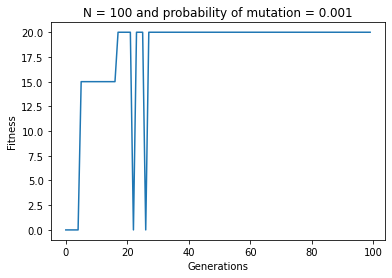

In [ ]:
plt.plot(generations_arr, net_res_arr)
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title("N = 100 and probability of mutation = 0.001")

## 1.2 N-Queen Problem 

In [ ]:
import random

In [ ]:
def init_chromosome(noQueens): # initialize chromosome with random values
  """
  Argument:
    noQueens -- number of queens
    
  Returns:
    chromosome -- a chromosome of length number of queens with random queen position
  """
  chromosome = [random.randint(1, noQueens) for _ in range(noQueens)]
  return chromosome

In [ ]:
init_chromosome(8) # check for above method

[4, 6, 8, 6, 4, 4, 5, 6]

In [ ]:
def calc_fitness(chromosome): # calculate fitness of a chromosome
  """
  Argument:
    chromosome -- a list of length equal to number of queens
    
  Returns:
    fitness -- number of queens in valid order
  """
  
  inv_horizontal = 0
  for i in range(len(chromosome)):
    for j in range(i+1, len(chromosome)):
      if chromosome[i] == chromosome[j]:
        inv_horizontal += 1

  # print(inv_horizontal)
  n = len(chromosome)
  inv_vertical = 0

  for i in range(len(chromosome)):
    c = 1
    for j in range(i+1, len(chromosome)):
      if chromosome[i]+c <= n and chromosome[i]+c == chromosome[j]:
        inv_vertical += 1
      if chromosome[i]-c > 0 and chromosome[i]-c == chromosome[j]:
        inv_vertical += 1
      c += 1
      
  # print(inv_vertical)

  maxFitness = (n*(n-1))//2
  return maxFitness - (inv_horizontal + inv_vertical)

In [ ]:
# check for above method
l = [2, 4, 7, 4, 8, 5, 5, 2]
print("Fitness for", l, "is:", calc_fitness(l))
l = [3, 2, 7, 5, 2, 4, 1, 1]
print("Fitness for", l, "is:", calc_fitness(l))
l = [2, 4, 4, 1, 5, 1, 2, 4]
print("Fitness for", l, "is:", calc_fitness(l))
l = [3, 2, 5, 4, 3, 2, 1, 3]
print("Fitness for", l, "is:", calc_fitness(l))

Fitness for [2, 4, 7, 4, 8, 5, 5, 2] is: 24
Fitness for [3, 2, 7, 5, 2, 4, 1, 1] is: 23
Fitness for [2, 4, 4, 1, 5, 1, 2, 4] is: 20
Fitness for [3, 2, 5, 4, 3, 2, 1, 3] is: 11


In [ ]:
def selection(population, probabilities): # select two chromosomes from population for hybridization
  """
  Argument:
    population -- consists of all chromosomes
    probabilities -- corresponding probability of each chromosome
    
  Returns:
     -- selected chromosome
  """
  map = zip(population, probabilities)
  thresold = random.uniform(0, 1)
  upto = 0

  for k, v in map:
    if upto + v >= thresold:
      return k
    upto += v

  return population[0]

In [ ]:
def cross_over(chromosome1, chromosome2): # crossover of two randomly selected chromosomes
  """
  Argument:
    chromosome1 -- CHROMOSOME 1
    chromosome2 -- CHROMOSOME 2
    
  Returns:
     -- return crossed two chromosome
  """
  n = len(chromosome1)
  c = random.randint(0, n - 1)
  chr1 = chromosome1[0:c] + chromosome2[c:n]
  chr2 = chromosome2[0:c] + chromosome1[c:n]

  return chr1, chr2

In [ ]:
def mutate(chromosome): # mutation of a chromosome at a gene
  """
  Argument:
    chromosome -- CHROMOSOME 
    
  Returns:
     -- return mutate chromosome
  """
  n = len(chromosome)
  c = random.randint(0, n - 1)
  m = random.randint(1, n)
  chromosome[c] = m

  return chromosome

In [ ]:
def hybrid(population, maxFitness): # hybridization of chromosomes
  """
  Argument:
    population -- collection of chromosomes
    maxFitness -- maximum fitness of valid n-queen arrangement
    
  Returns:
    new_population -- return new population after successful hybridization
  """
  probability_mutation = 0.03
  new_population = []

  total_fitness = sum([calc_fitness(chromosome) for chromosome in population])
  probabilities = [calc_fitness(chromosome)/total_fitness for chromosome in population]
  
  for i in range(len(population)//2):
    chrom1 = selection(population, probabilities)
    chrom2 = selection(population, probabilities)

    c1, c2 = cross_over(chrom1, chrom2)

    if random.random() < probability_mutation:
      c1 = mutate(c1)
    if random.random() < probability_mutation:
      c2 = mutate(c2)
    
    new_population.append(c1)
    new_population.append(c2)

    if calc_fitness(c1) == maxFitness or calc_fitness(c2) == maxFitness:
      break
    
  return new_population

In [ ]:
# Initialization 
noQueens = 8
no_population = 50

In [ ]:
# Main method 
maxFitness = (noQueens*(noQueens-1))//2
population = [init_chromosome(noQueens) for i in range(no_population)]

generations = 1

while not maxFitness in [calc_fitness(chromosome) for chromosome in population]:
  population = hybrid(population, maxFitness)
  generations += 1

print("=== After {} number of generations ===".format(generations))

for chromosome in population:
  if calc_fitness(chromosome) == maxFitness:
    print("One of the valid solutions is:",chromosome)

=== After 3442 number of generations ===
One of the valid solutions is: [3, 6, 2, 5, 8, 1, 7, 4]
